# WordCloud using Python

For this project, we create a "word cloud" from a text by writing a Python script. This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words. A dictionary is the output of the 'calculate_frequencies' function. The wordcloud module will then generate the image from the dictionary.

For the input text, we will provide a file that contains text only. For the text itself, I have used the 'Data Science vs. Data Analytics.txt' file.Now we need to upload our input file here so that our script will be able to process it. To do the upload, we will need an uploader widget. 

In [2]:
# Here are all the installs and imports that we will need for our word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing D:\Python\Anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\anank\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\anank\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\anank\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


After running the above cell containing the installs and imports, we will need save this notebook now by selecting Close and Halt under the File menu. When the notebook has completely shut down, we reopen it to make the necessary changes take affect.

To upload our text file, we run the following cell that contains all the code for a custom uploader widget. Once we run this cell, a "Browse" button should appear below it. We can click this button and navigate the window to locate our saved text file.

In [3]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Data Science vs. Data Analytics.txt` (5.30 kB)


The uploader widget saved the contents of our uploaded file into a string object named file_contents that your word cloud script can process. 

Now we define a function in the cell below that iterates through the words in file_contents, removes punctuation, and counts the frequency of each word and ignores word case, and words that do not contain all alphabets and boring words like "and" or "the". Then use it in the 'generate_from_frequencies' function to generate our very own Word Cloud!

In [17]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "on", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    freq_result = {}
    words = file_contents.split()
    for word in words:
        word = word.lower()
        if word in uninteresting_words:
            pass
        else:
            for letter in word:
                if letter in punctuations:
                    letter.replace(punctuations,"")
            if word not in freq_result.keys():
                freq_result[word]=0
            else:
                freq_result[word]+=1
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(freq_result)
    return cloud.to_array()

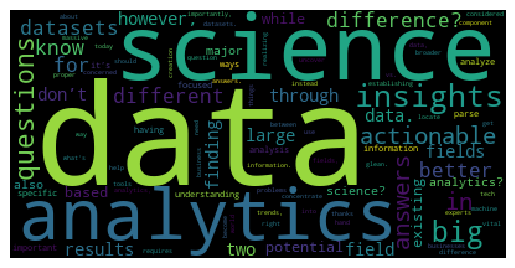

In [18]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()